In [1]:
from splinter import Browser
from bs4 import BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import ssl
import requests
import matplotlib.pyplot as plt


In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
 url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
data = requests.get(url).text

In [4]:
weather= pd.read_html(url)
table=weather[0]
table

id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6     -75.0     739.0
1       13       2012-08-17    11  156      6     -76.0     740.0
2       24       2012-08-18    12  156      6     -76.0     741.0
3       35       2012-08-19    13  157      6     -74.0     732.0
4       46       2012-08-20    14  157      6     -74.0     740.0
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5     -78.0     730.0
1863  1892       2018-02-24  1974  134      5     -77.0     729.0
1864  1894       2018-02-25  1975  134      5     -76.0     729.0
1865  1893       2018-02-26  1976  135      5     -77.0     728.0
1866  1895       2018-02-27  1977  135      5     -77.0     727.0

[1867 rows x 7 columns]

1.How many months exist on Mars?
Using the number of martial months used in the table there are 12 months on Mars.


In [5]:
months =table.loc[:,'month'].unique()
months

array([ 6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5], dtype=int64)

2.How many Martian (and not Earth) days worth of data exist in the scraped dataset? 466.75 Martian Days

In [6]:
days = table.loc[:,'terrestrial_date'].count()


In [7]:
days/4

466.75

3.What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question
-Find the average the minimum daily temperature for all of the months.
-Plot the results as a bar chart.
Looking at the charts below, martian month 3 has the lowest temperature,while the month with the highest temperature is martian month 8


In [8]:
avgs_per_month = table.groupby('month').agg({'min_temp':['mean']})
avgs_per_month



min_temp
            mean
month           
1     -77.160920
2     -79.932584
3     -83.307292
4     -82.747423
5     -79.308725
6     -75.299320
7     -72.281690
8     -68.382979
9     -69.171642
10    -71.982143
11    -71.985507
12    -74.451807

(0.0, -100.0)

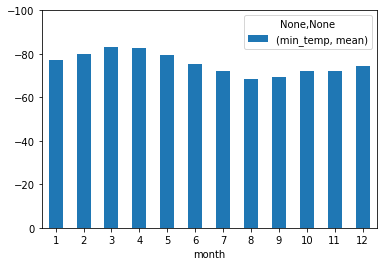

In [9]:
avgs_per_month.plot.bar()
plt.xticks(rotation=360)
plt.ylim(0, -100)


4.Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
Find the average the daily atmospheric pressure of all the months.
Plot the results as a bar chart.
Looking at the charts below, martian month 6 has the lowest pressure ,while the month with the highest pressure is martian month 9



In [10]:
pressure_month = table.groupby('month').agg({'pressure':['mean']})
pressure_month


pressure
             mean
month            
1      862.488506
2      889.455056
3      877.322917
4      806.329897
5      748.557047
6      745.054422
7      795.105634
8      873.829787
9      913.305970
10     887.312500
11     857.014493
12     842.156627

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

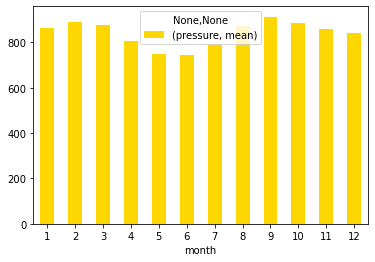

In [18]:
pressure_month.plot(kind='bar', color='gold')
plt.xticks(rotation=360)


In [33]:
1967/12

163.91666666666666

5.About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
Consider how many days elapse on Earth in the time that Mars circles the Sun once.
Visually estimate the result by plotting the daily minimum temperature.

Based on the scrapped table 1967 days earth days had passed in this Martian year 



In [34]:
plt.rcParams["figure.figsize"] = [500, 200]
plt.rcParams["figure.autolayout"] = True
columns = ["sol", "min_temp"]
df = pd.read_csv("Mars_Temp_Data.csv", usecols=columns)

plt.plot(df.sol, df.min_temp)
plt.show()

In [35]:
New_csv = table.to_csv('Mars_Temp_Data.csv')